In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

C:\Users\mainf\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
input_dir = 'archive (18)/Data'
categories = ['glioma_tumor','meningioma_tumor','normal','pituitary_tumor']

data = []
labels = []

for category_idx,category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path = os.path.join(input_dir,category,file)
        img = imread(img_path)
        img = resize(img,(15,15))
        data.append(img.flatten())
        labels.append(category_idx)
        

In [3]:
number_classes = {
    'glioma_tumor': len(os.listdir('archive (18)/Data/glioma_tumor')),
    'meningioma_tumor': len(os.listdir('archive (18)/Data/meningioma_tumor')),
    'normal': len(os.listdir('archive (18)/Data/normal')),
    'pituitary_tumor': len(os.listdir('archive (18)/Data/pituitary_tumor'))
}

In [4]:
number_classes

{'glioma_tumor': 901,
 'meningioma_tumor': 913,
 'normal': 438,
 'pituitary_tumor': 844}

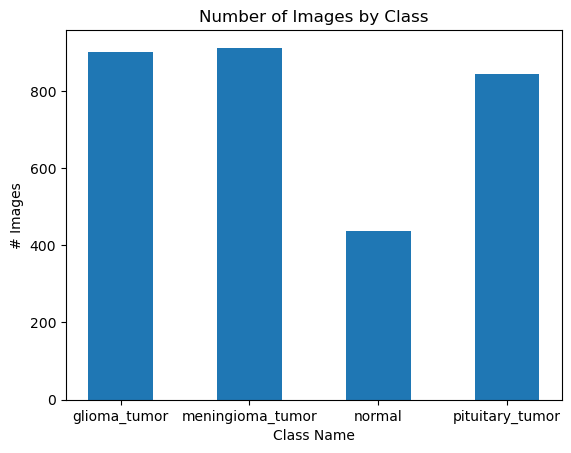

In [5]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [6]:
from PIL import Image
import dask.bag as bag
from dask import diagnostics


In [20]:
directories = {
    'glioma_tumor': 'archive (18)/Data/glioma_tumor',
    'meningioma_tumor': 'archive (18)/Data/meningioma_tumor',
    'normal': 'archive (18)/Data/normal',
    'pituitary_tumor': 'archive (18)/Data/pituitary_tumor'
}

def get_dims(file):

    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

In [8]:
get_dims('archive (18)/Data/glioma_tumor/G_1.jpg')

(256, 256)

901
[########################################] | 100% Completed | 1.95 ss
913
[########################################] | 100% Completed | 1.74 ss
438
[########################################] | 100% Completed | 1.53 ss
844
[########################################] | 100% Completed | 1.75 ss


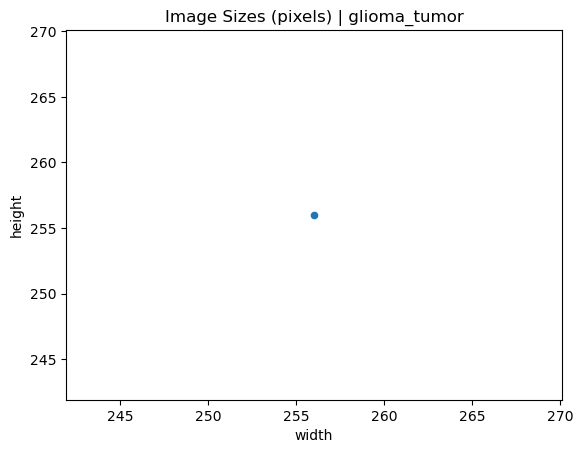

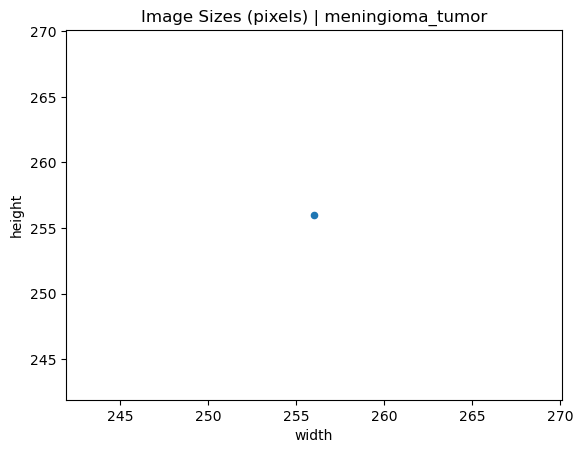

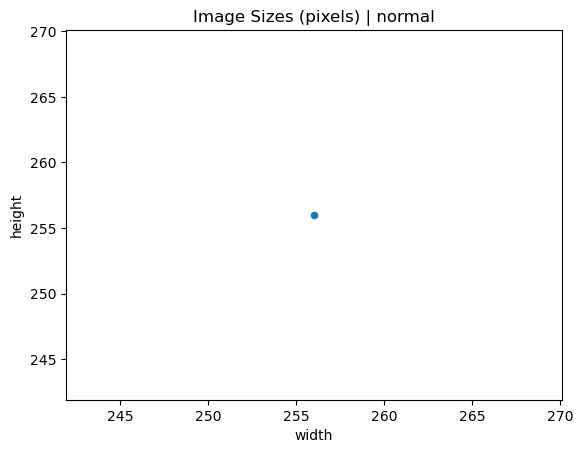

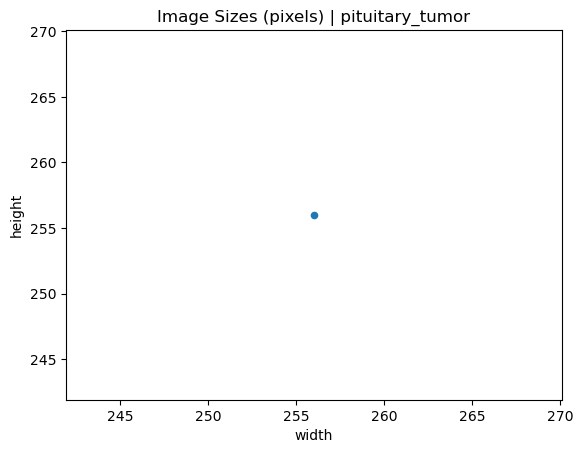

In [9]:
for n,d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    print(len(filelist))
    dims = bag.from_sequence(filelist).map(get_dims)
    with diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

In [18]:
data = np.asarray(data)
labels = np.asarray(labels)

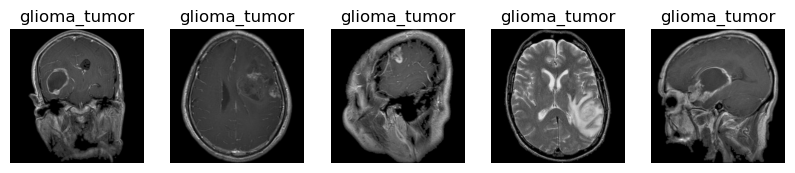

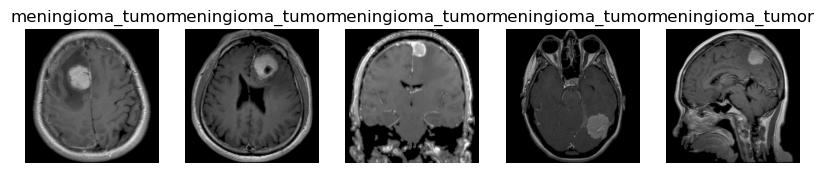

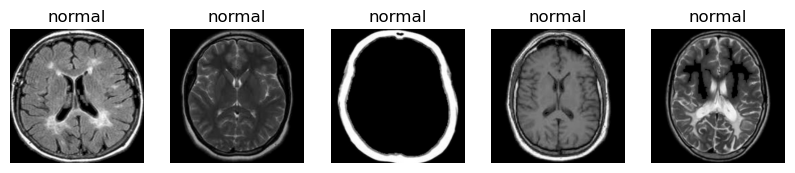

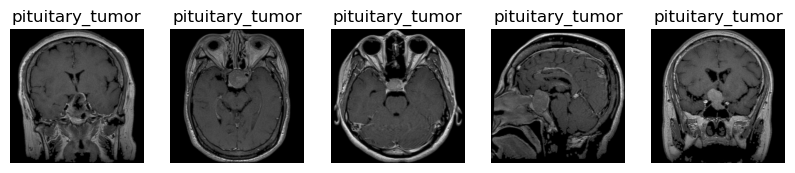

In [28]:
import random
from PIL import Image
for i in directories.values():
    image_files = os.listdir(i) 
    sampled_images = random.sample(image_files, 5)


    plt.figure(figsize=(10, 10)) 
    for j, image_file in enumerate(sampled_images):
        img = Image.open(os.path.join(i, image_file))
        plt.subplot(1, 5, j + 1)
        plt.imshow(img)
        plt.axis('off')
        parts = i.split('/')
        plt.title(parts[-1])
plt.show()


In [22]:
data

array([[1.29676122e-12, 1.29676122e-12, 1.29676122e-12, ...,
        1.74988130e-05, 1.74988130e-05, 1.74988130e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.33767273e-12, 1.33767273e-12, 1.33767273e-12],
       [4.22922865e-14, 4.22922865e-14, 4.22922865e-14, ...,
        4.41609308e-09, 4.41609308e-09, 4.41609308e-09],
       ...,
       [3.82682482e-09, 3.82682482e-09, 3.82682482e-09, ...,
        4.71911205e-05, 4.71911205e-05, 4.71911205e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.41258522e-03, 1.41258522e-03, 1.41258522e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.61911932e-04, 1.61911932e-04, 1.61911932e-04]])

In [4]:
len(data)

3096

In [5]:
len(labels) 

3096

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=.2,stratify=labels,shuffle=True)

In [8]:
classifier = SVC()

parameters = [{'gamma': [0.01,0.001,0.0001],'C':[1,10,100,1000]}]

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_

In [11]:
y_preds = best_model.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       180
           1       0.80      0.82      0.81       183
           2       0.96      0.82      0.88        88
           3       0.91      0.88      0.89       169

    accuracy                           0.84       620
   macro avg       0.86      0.84      0.85       620
weighted avg       0.85      0.84      0.84       620



In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Keras is simplier to use 
#Pytorch is more "Pythonic"
#Tenosr flow is the most complex to learn

